# CTSM Simulations at NEON Tower Sites -- Tutorial 

This tutorial is an introduction to running the Community Terrestrial Systems Model (CTSM) at NEON tower sites.  It will guide you through running a simulation and provides example visualization of the simulation results.

There are several configuration options of CTSM, and throughout this tutorial we will use the Community Land Model (CLM) configuration which is the climate and biogeochemistry mode of CTSM. Throughout the rest of this tutorial, we refer to the model as CLM and will use version 5.1 with active biogeochemistry (CLM5.1-BGC).
***

## In this tutorial

The tutorial has several components. Below you will find steps to: 
1. Set up and run a simulation
2. Locate CLM model data
3. Look at a plot of simulated soil temperature data

***
**The tutorial uses a Jupyter Notebook.** A Jupyter Notebook is an interactive computing environment that enables the creation and sharing of documents that contain discrete cells of text or documentation and executable code, including plots. It allows users to access, run, and edit the code in a browser. To interact with this notebook:

- Execute or "run" cells of executable code (cells denoted with '[ ]:') using the play button in the menu at the top (see below image)

- The results of running code, such as plots, will appear below that cell

- Each step must be followed in order, otherwise you may encounter errors

![run cell](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

For more information on Jupyter notebooks please see the [Jupyter Notebook Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html). 
***

<h2> 1. Set up and run a simulation</h2>

*This step guides you through running a CLM model simulation for a NEON flux tower using meteorology observations from the tower. Here, the many steps to run CLM are condensed into a single function. If you would like a more advanced tutorial to change the model configuration or code, please see [tutorial coming soon] for additional instructions.* <br>

***
<h4>1.1 Select a NEON tower site to simulate.</h4>

NEON towers currently available for simulation include:  

>ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD.  

The [NEON website](https://www.neonscience.org/field-sites/explore-field-sites) describes tower sites in more detail.

Before running the below code, keep in mind:
- The executable code below selects the **ABBY** site for simulation. If you would like to simulate a different tower, select the NEON tower from the above list and change the 4-character site name inside the quotes below.
- The site must be defined correctly so you do not get an error in the next step.
    - use all capital letters 
    - double-check that the letters match one of the above site names

*Execute the the cell below by clicking on the play button in the menu bar above.*

In [1]:
#Change the 4-character NEON site below.
neon_site= "ABBY"

import os
os.environ['site'] = neon_site

***
<h4>1.2 Create and run a NEON tower site simulation.</h4>  

The executable code below runs a python script, `run_neon.py`. This script:

* creates (`create_newcase`)
* sets up (`case.setup`)
* compiles (`case.build`)
* runs (`case.submit`)
    
a simulation for the tower site you specified above for all years that tower meteorology data are available.

*Run the cell below.* Note that this step downloads the input data (~7GB) required for the model simulation. It may take several minutes to run, so please be patient. Many things will print below the cell as data are downloaded and the model compiles. You might see lines print that say 'ERROR 404: Not Found' and this is ok. You will also likely notice that many files are moved after the simulation completes.

*Note: we are working to update this code so that it prints fewer lines*

In [ ]:
run_neon --neon-sites $site --output-root ~/CLM-NEON

<br><br>The model is done running when you see: 

>st_archive completed <br>
>Submitted job case.run with id None <br>
>Submitted job case.st_archive with id None <br>

If you see this message, great! You've created and run CLM for the NEON tower you selected, and we'll look at simulated data next.


**Note** that you can also run the above line of code in your terminal shell but you will need to point to the location of the file where you specify the NEON site and the output-root path:

`run_neon.py --neon-sites <site> --output-root <path>` 

More details about setting up and modifying simulations will be available in an upcoming tutorial. 

Additional information about CLM is available [on the website](https://www.cesm.ucar.edu/models/cesm2/land/), including [technical documentation](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/index.html), a [user's guide](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/index.html), and a [quickstart guide](https://escomp.github.io/CESM/release-cesm2/quickstart.html#create-a-case) to running other model configurations.
<br><br>
***

<h4> Optional </h4>

If you would like to see additional and more advanced options for running NEON tower site simulations, many are listed in the python script you just executed. You can use the `--help` option to see more. <p>

*Executing the below cell is optional and will print options available options in the `run_neon` python script*:

In [ ]:
run_neon --help

________
<h2> 2. Explore CTSM model data </h2>

*When your simulation completes, this step guides you through exploring the data.
There are countless ways of analyzing and processing model data. 
The below steps show where model data were created and will create a plot from the model data.*
***

<h3> 2.1 Locate model data </h3>

When a simulation completes, the data are transferred to the `archive` directory. In this directory, there are files that include data for every day of the simulation, as well as files that average model variables monthly. <p>

*Run the code below to see a subset of the files listed.*

In [2]:
!ls ~/archive/$site.transient/lnd/hist/*2018*.nc |head -20

/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-01.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-02.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-03.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-04.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-05.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-06.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-07.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-08.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-09.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-10.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-11.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-12.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h1.2018-01-01


Notice that each line includes the location of the file (`/home/user/archive/{simulation_name}/lnd/hist`) and file name. The file names are automatically generated and are composed of:
* the simulation name, which includes:
    * the NEON site
    * the type of simulation (here the simulation is "transient", meaning the model ran for the full length of available data)
* the date of simulated data

The files are saved in netcdf format (denoted with the `.nc` file extension), a file format commonly used for storing large, multi-dimensional scientific variables.
Netcdf files are platform independent and self-describing; each file includes metadata that describes the data, including: **variables**, **dimensions**, and **attributes**. We will explore the files more in the NEON_Simple_Visualization_Tutorial

The NEON tower simulations generate two types of files:
* `*h0*`: Variables that are averaged monthly. One file is available for every month of the simulation.
* `*h1*`: Variables that are recorded every 30 minutes. Values are aggregated into one file for each day of the simulation. Each file includes 48 data points.

*Note that you can also find the model data in the 'Simulation' folder on your desktop, which was created as part of this tutorial.*
****


<h3>2.2 Visualize the output </h3>
Below we create a plot of simulated soil temperature.

To do this, we use a predefined function, `quick_soil_profile` to check the soil_profile . 

This function points to the files we explored above and extracts one variable, soil temperature `TSOI` in this case, and plots the soil profile. The y-axis shows soil depth and the x-axis shows time, which is currently set for the year 2018. You can change the `year` variable from 2018 through the current year.

  2%|▏         | 6/365 [00:00<00:06, 52.49it/s]

All Simulation files: [ 365 files]


100%|██████████| 365/365 [00:06<00:00, 58.23it/s]


Reading all simulation files [ 365 files] took: 11.48273229598999 s.
Making this plot took  11.550240516662598 s.


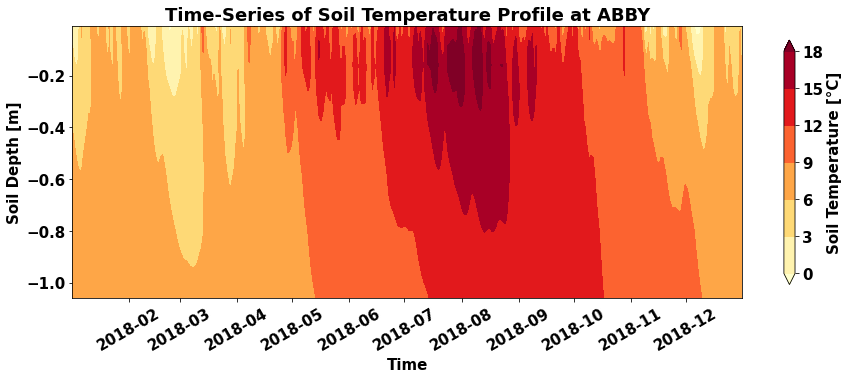

In [3]:
from neon_utils import plot_soil_profile_timeseries
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'TSOI', year)

Now, let's make a similar plot for soil moisture (`H2OSOI`):

  2%|▏         | 6/365 [00:00<00:06, 56.48it/s]

All Simulation files: [ 365 files]


100%|██████████| 365/365 [00:06<00:00, 59.24it/s]


Reading all simulation files [ 365 files] took: 11.184041976928711 s.
Making this plot took  11.259418249130249 s.


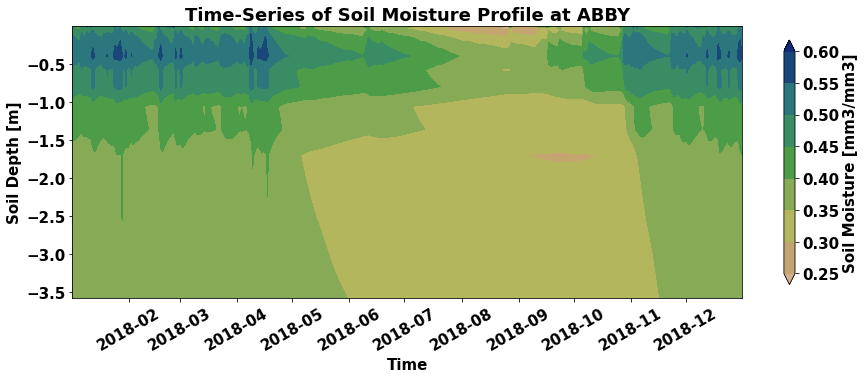

In [4]:
sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

plot_soil_profile_timeseries(sim_path, neon_site, case_name, 'H2OSOI', year)

### Congratulations! 
You have now completed a NEON tower simulation, located the files, and made a plot from the simulation data.

Additional examples of visualizations and evaluation of your NEON simulation against NEON observations are available in the next tutorial, `NEON_Visualization_Tutorial`.